<a href="https://colab.research.google.com/github/lanbowen23/CSCE636/blob/master/HW3_dogcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolution Network for Image Classification

### Download the Datasets

In [2]:
!git clone https://github.com/lanbowen23/cats_and_dogs_small.git

Cloning into 'cats_and_dogs_small'...
remote: Enumerating objects: 4018, done.
remote: Counting objects: 100% (4018/4018), done.
remote: Compressing objects: 100% (4015/4015), done.
remote: Total 4018 (delta 0), reused 4017 (delta 0), pack-reused 0
Receiving objects: 100% (4018/4018), 86.08 MiB | 32.02 MiB/s, done.


In [0]:
import os


base_dir = 'cats_and_dogs_small/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


### Build the Network

In [1]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Configure

In [0]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Train: 100 steps * 20 per batch = 2000 samples

#### Val: 50 steps * 20 per batch = 1000 samples

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 16s 155ms/step - loss: 0.6902 - acc: 0.5375 - val_loss: 0.6854 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6513 - acc: 0.6225 - val_loss: 0.6402 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5996 - acc: 0.6740 - val_loss: 0.6169 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5640 - acc: 0.7025 - val_loss: 0.6003 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5315 - acc: 0.7415 - val_loss: 0.5967 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5048 - acc: 0.7480 - val_loss: 0.5808 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.4838 - acc: 0.7575 - val_loss: 0.6064 - val_acc: 0.6880
Epoch 8

### Save the model

In [0]:
model.save('cats_and_dogs_small_1.h5')

### Plot the loss and accuracy of training and validation data during training

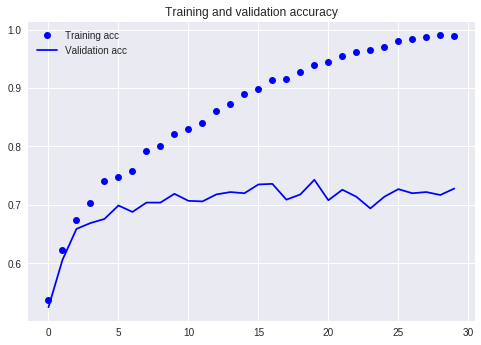

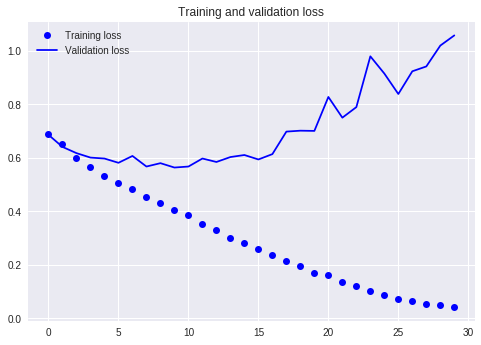

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Using data augmentation to overcome the overfitting for computer vision

- dropout
- weight decay(L2 regularization)

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,  # range within which to randomly rotate
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

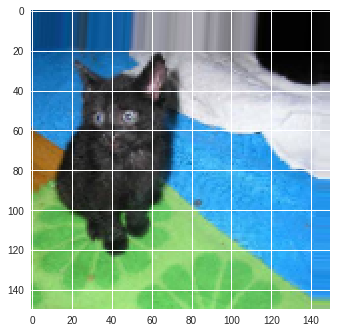

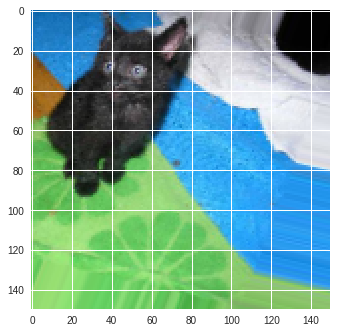

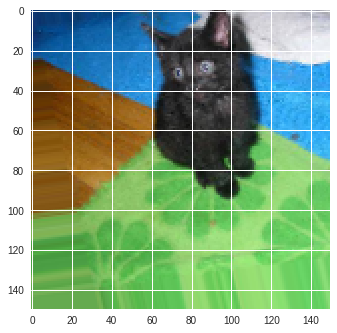

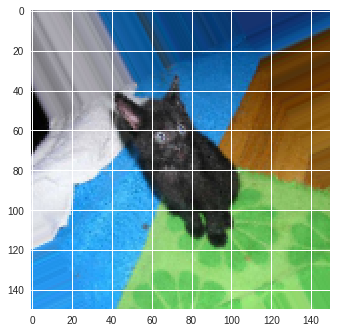

In [13]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) 
          for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Add Dropout before densely-connected classifier

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6919 - acc: 0.5325 - val_loss: 0.6875 - val_acc: 0.5013
Epoch 2/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6792 - acc: 0.5631 - val_loss: 0.6774 - val_acc: 0.5644
Epoch 3/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6643 - acc: 0.5947 - val_loss: 0.6388 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 30s 295ms/step - loss: 0.6465 - acc: 0.6300 - val_loss: 0.6704 - val_acc: 0.5805
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6357 - acc: 0.6344 - val_loss: 0.6013 - val_acc: 0.6789
Epoch 6/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6213 - acc: 0.6616 - val_loss: 0.6025 - val_acc: 0.6630
Epoch 7/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6038 - acc: 0.6659 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

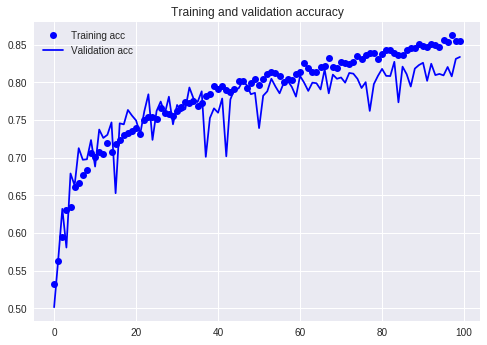

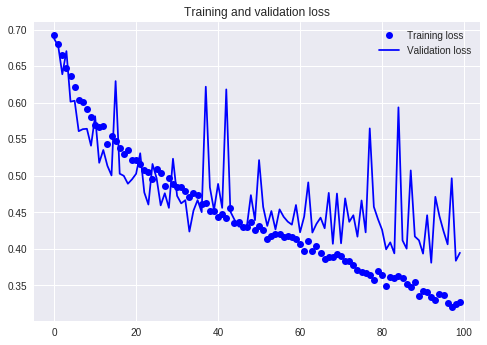

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()